In [94]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from math import sqrt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
data = load_digits()
data.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
X = data.data
y = data.target

In [ ]:
X.shape

(1797, 64)

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
cross_val_score(clf, X,y,cv=10).mean()

0.8235909373060212

In [ ]:
bag = BaggingClassifier(clf,n_estimators=100 )

In [ ]:
cross_val_score(bag, X,y,cv=10).mean()

0.9198324022346368

In [ ]:
max_features = int(sqrt(X.shape[1]))
max_features

8

In [ ]:
bag2 = BaggingClassifier(clf,n_estimators=100,max_features=max_features)


In [ ]:
cross_val_score(bag2, X,y,cv=10).mean()

0.9315518311607697

In [ ]:
clf2 = DecisionTreeClassifier(max_features=max_features)

In [ ]:
bag3 = BaggingClassifier(clf2, n_estimators=100)

In [ ]:
cross_val_score(bag3, X,y,cv=10).mean()

0.9454593420235877

In [ ]:
clf3 = RandomForestClassifier(n_estimators=100, max_features=max_features)

In [ ]:
cross_val_score(clf3,X,y,cv=10).mean()

0.948792675356921

In [104]:
n_estimators_arr = np.arange(10, 1010, 100)
max_features_arr = np.arange(1, 65, 4)
max_depth_arr = np.arange(1, 100, 10)

In [ ]:
param_grid = {'n_estimators':n_estimators, 'max_features':max_features, 'max_depth':max_depth}

In [ ]:
clf4 = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)

In [99]:
scores_est = []
for n_estimators in n_estimators_arr:
  clf4 = RandomForestClassifier(n_estimators=n_estimators)
  scores_est.append(cross_val_score(clf4, X, y,cv=10).mean())
  

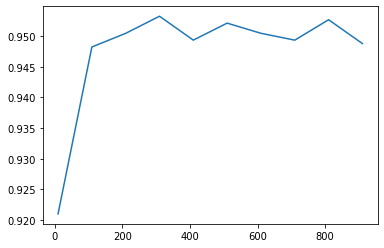

In [102]:
pylab.plot(n_estimators_arr, scores_est)

In [105]:
scores_feat = []
for max_features in max_features_arr:
  clf4 = RandomForestClassifier(max_features=max_features)
  scores_feat.append(cross_val_score(clf4, X, y,cv=10).mean())
  

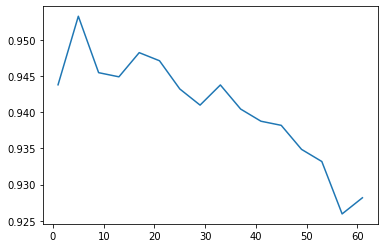

In [106]:
pylab.plot(max_features_arr, scores_feat)

In [107]:
scores_dept = []
for max_depth in max_depth_arr:
  clf4 = RandomForestClassifier(max_depth=max_depth)
  scores_dept.append(cross_val_score(clf4, X, y,cv=10).mean())

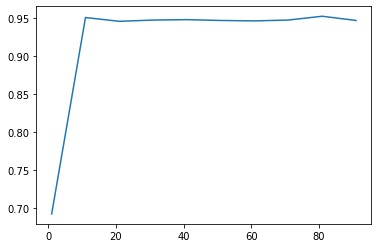

In [108]:
pylab.plot(max_depth_arr, scores_dept)